In [1]:
# choosing loss function as Residual sum of squres (y -y_hat)^2 
# m & b 
# b = β^0 = y¯− β^1 x¯.
# m = cov (x, y) / var(x) = ∑ (x-x_mean) * (y-y_mean) / ∑(x-x_mean)
 
# this is class of simple linear regression 
class LineraRe:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, x_train, y_train):
        y_index = 0 
        sum_variance = 0
        sum_covariance = 0
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        for value in x_train:
            sum_variance += (value-x_mean)**2
            sum_covariance += (value-x_mean)*(y_train.iloc[y_index]-y_mean)
            y_index+=1;
        self.m = (sum_covariance/sum_variance)
        self.b = y_mean - self.m*x_mean
        
    def predict(self, x_test):
        return self.m*x_test+self.b


In [79]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [80]:
df = pd.read_csv("./placement.csv")

In [81]:
df.head()

,cgpa,salary
0,7.5,14
1,6.5,6
2,8.5,9
3,5.0,3
4,6.9,8


In [82]:
x = df.iloc[:,0]
y = df.iloc[:,1]
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=2)

In [83]:
model = LineraRe()
model.fit(x_train,y_train)
model.m,model.b

(4.548794650008009, -22.295901409578732)

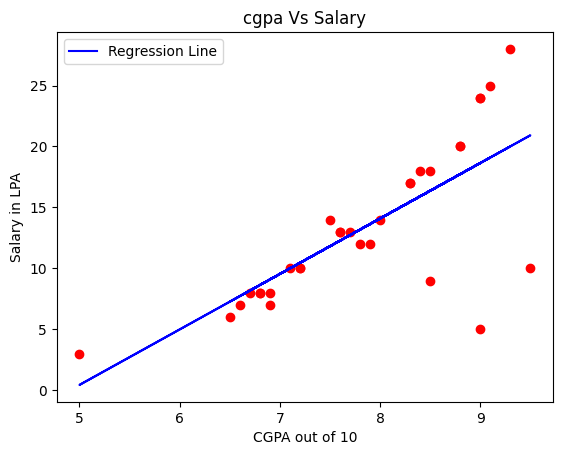

In [100]:
plt.scatter(x_train,y_train,color='red')
plt.title("cgpa Vs Salary")
plt.ylabel("Salary in LPA")
plt.xlabel("CGPA out of 10")
x_vals = x_train.values
y_pred = model.m * x_vals + model.b
plt.plot(x_vals, y_pred, color='blue', label='Regression Line')
plt.legend()
plt.show()

In [103]:
# Testing with the readymade model available in the scikit learn 
from sklearn.linear_model import LinearRegression

In [104]:
model = LinearRegression()

In [107]:
model.fit(x_train.to_frame(),y_train)

LinearRegression()

In [109]:
model.coef_,model.intercept_

(array([4.54879465]), -22.295901409578725)